In [3]:
# Install necessary libraries (uncomment in notebook environments if needed)
# %pip install yfinance
# %pip install requests
# %pip install beautifulsoup4

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

def get_sp500_tickers_and_industries():
    # Fetch S&P 500 constituents from Wikipedia
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

def get_data(tickers):
    # Create a dictionary to hold data for each ticker
    data = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker, start="2010-01-01", end="2024-10-01")
            data[ticker] = df
        except Exception as e:
            print(f"Could not retrieve data for {ticker}: {e}")
    return data

def industry_selection(tickers_data):
    print("Select an industry:")
    industry_options = set(data['GICS Sector'] for data in tickers_data.values())
    for idx, industry in enumerate(industry_options):
        print(f"{idx + 1}: {industry}")

    industry_choice = int(input("Enter the number of the industry you want to select: ")) - 1
    selected_industry = list(industry_options)[industry_choice]

    print(f"You selected the industry: {selected_industry}")
    
    # Filter the tickers based on the selected industry
    selected_tickers = [(ticker, data['Security']) for ticker, data in tickers_data.items() if data['GICS Sector'] == selected_industry]
    return selected_tickers

def get_company_info(ticker, company_name):
    stock = yf.Ticker(ticker)

    # Retrieve company info from Yahoo Finance
    info = stock.info

    # Extract full address information
    address1 = info.get('address1', 'N/A')
    address2 = info.get('address2', '')
    city = info.get('city', '')
    state = info.get('state', '')
    zip_code = info.get('zip', '')
    country = info.get('country', 'N/A')

    # Format full address
    full_address = f"{address1}, {address2} {city}, {state} {zip_code}, {country}".strip(", ")

    # Extract additional company information
    full_time_employees = info.get('fullTimeEmployees', 'N/A')
    company_summary = info.get('longBusinessSummary', 'N/A')

    # Retrieve governance risk information
    audit_risk = info.get('auditRisk', 'N/A')
    board_risk = info.get('boardRisk', 'N/A')
    compensation_risk = info.get('compensationRisk', 'N/A')
    shareholder_rights_risk = info.get('shareHolderRightsRisk', 'N/A')
    overall_risk = info.get('overallRisk', 'N/A')

    return full_address, full_time_employees, company_summary, {
        'Audit Risk': audit_risk,
        'Board Risk': board_risk,
        'Compensation Risk': compensation_risk,
        'Shareholder Rights Risk': shareholder_rights_risk,
        'Overall Risk': overall_risk
    }

# Main Execution
tickers_data = get_sp500_tickers_and_industries()
selected_tickers = industry_selection(tickers_data)

print("Select a company ticker from the following:")
for idx, (ticker, company_name) in enumerate(selected_tickers):
    print(f"{idx + 1}: {ticker} - {company_name}")

company_choice = int(input("Enter the number of the company you want to select: ")) - 1
selected_ticker, selected_company_name = selected_tickers[company_choice]  # Get both the ticker symbol and the company name

# Get and display the company information
full_address, full_time_employees, company_summary, governance_risks = get_company_info(selected_ticker, selected_company_name)

print(f"\nCompany Information for {selected_company_name} ({selected_ticker}):")
print(f"Full Address: {full_address}")
print(f"Full-Time Employees: {full_time_employees}")
print(f"Company Summary: {company_summary}")
print("\nGovernance Risks:")
for key, value in governance_risks.items():
    print(f"{key}: {value}")

Select an industry:
1: Financials
2: Consumer Discretionary
3: Materials
4: Energy
5: Communication Services
6: Utilities
7: Consumer Staples
8: Real Estate
9: Industrials
10: Health Care
11: Information Technology


Enter the number of the industry you want to select:  5


You selected the industry: Communication Services
Select a company ticker from the following:
1: GOOGL - Alphabet Inc. (Class A)
2: GOOG - Alphabet Inc. (Class C)
3: T - AT&T
4: CHTR - Charter Communications
5: CMCSA - Comcast
6: EA - Electronic Arts
7: FOXA - Fox Corporation (Class A)
8: FOX - Fox Corporation (Class B)
9: IPG - Interpublic Group of Companies (The)
10: LYV - Live Nation Entertainment
11: MTCH - Match Group
12: META - Meta Platforms
13: NFLX - Netflix
14: NWSA - News Corp (Class A)
15: NWS - News Corp (Class B)
16: OMC - Omnicom Group
17: PARA - Paramount Global
18: TMUS - T-Mobile US
19: TTWO - Take-Two Interactive
20: VZ - Verizon
21: DIS - Walt Disney Company (The)
22: WBD - Warner Bros. Discovery


Enter the number of the company you want to select:  5



Company Information for Comcast (CMCSA):
Full Address: One Comcast Center, 1701 JFK Boulevard Philadelphia, PA 19103-2838, United States
Full-Time Employees: 186000
Company Summary: Comcast Corporation operates as a media and technology company worldwide. It operates through Residential Connectivity & Platforms, Business Services Connectivity, Media, Studios, and Theme Parks segments. The Residential Connectivity & Platforms segment provides residential broadband and wireless connectivity services, residential and business video services, sky-branded entertainment television networks, and advertising. The Business Services Connectivity segment offers connectivity services for small business locations, which include broadband, wireline voice, and wireless services, as well as solutions for medium-sized customers and larger enterprises; and small business connectivity services in the United Kingdom. The Media segment operates NBCUniversal's television and streaming business, including n

Select an industry:
1: Communication Services
2: Information Technology
3: Real Estate
4: Utilities
5: Consumer Staples
6: Health Care
7: Energy
8: Financials
9: Industrials
10: Consumer Discretionary
11: Materials


Enter the number of the industry you want to select:  2


You selected the industry: Information Technology
Select a company ticker from the following:
1: ACN - Accenture
2: ADBE - Adobe Inc.
3: AMD - Advanced Micro Devices
4: AKAM - Akamai Technologies
5: APH - Amphenol
6: ADI - Analog Devices
7: ANSS - Ansys
8: AAPL - Apple Inc.
9: AMAT - Applied Materials
10: ANET - Arista Networks
11: ADSK - Autodesk
12: AVGO - Broadcom
13: CDNS - Cadence Design Systems
14: CDW - CDW
15: CSCO - Cisco
16: CTSH - Cognizant
17: GLW - Corning Inc.
18: CRWD - CrowdStrike
19: DELL - Dell Technologies
20: ENPH - Enphase Energy
21: EPAM - EPAM Systems
22: FFIV - F5, Inc.
23: FICO - Fair Isaac
24: FSLR - First Solar
25: FTNT - Fortinet
26: IT - Gartner
27: GEN - Gen Digital
28: GDDY - GoDaddy
29: HPE - Hewlett Packard Enterprise
30: HPQ - HP Inc.
31: IBM - IBM
32: INTC - Intel
33: INTU - Intuit
34: JBL - Jabil
35: JNPR - Juniper Networks
36: KEYS - Keysight Technologies
37: KLAC - KLA Corporation
38: LRCX - Lam Research
39: MCHP - Microchip Technology
40: MU - Mic

Enter the number of the company you want to select:  48



Company Information for Oracle Corporation (ORCL):
Full Address: 2300 Oracle Way,  Austin, TX 78741, United States
Full-Time Employees: 159000
Company Summary: Oracle Corporation offers products and services that address enterprise information technology environments worldwide. Its Oracle cloud software as a service offering include various cloud software applications, including Oracle Fusion cloud enterprise resource planning (ERP), Oracle Fusion cloud enterprise performance management, Oracle Fusion cloud supply chain and manufacturing management, Oracle Fusion cloud human capital management, Oracle Cerner healthcare, and NetSuite applications suite, as well as Oracle Fusion Sales, Service, and Marketing. The company also offers cloud-based industry solutions for various industries; Oracle application licenses; and Oracle license support services. In addition, it provides cloud and license business' infrastructure technologies, such as the Oracle Database and MySQL Database; Java, a

[*********************100%***********************]  1 of 1 completed


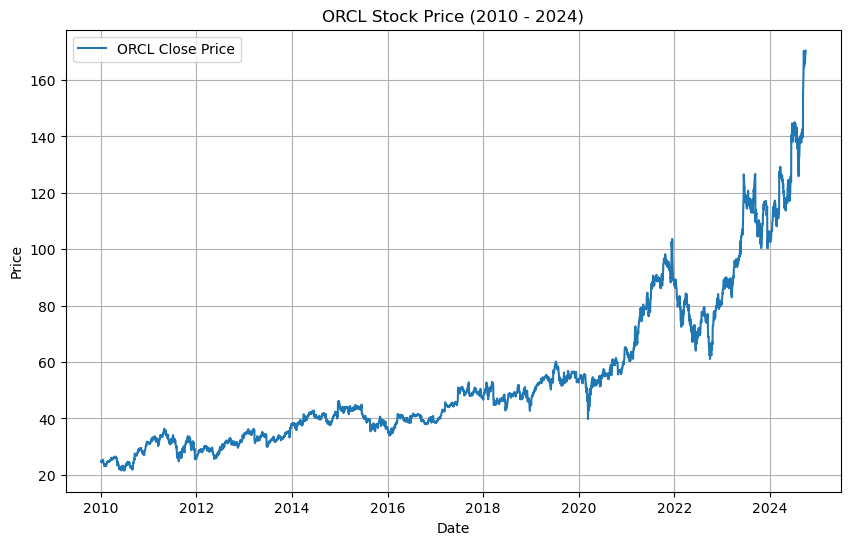

In [1]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

def get_sp500_tickers_and_industries():
    # Fetch S&P 500 constituents from Wikipedia
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url)
    df = tables[0]  # The first table contains the S&P 500 data
    df = df[['Symbol', 'GICS Sector', 'Security']]  # Select relevant columns
    tickers_data = df.set_index('Symbol')[['GICS Sector', 'Security']].to_dict(orient='index')  # Create a dictionary of tickers, sectors, and company names
    return tickers_data

def get_data(tickers):
    # Create a dictionary to hold data for each ticker
    data = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker, start="2010-01-01", end="2024-10-01")
            data[ticker] = df
        except Exception as e:
            print(f"Could not retrieve data for {ticker}: {e}")
    return data

def industry_selection(tickers_data):
    print("Select an industry:")
    industry_options = set(data['GICS Sector'] for data in tickers_data.values())
    for idx, industry in enumerate(industry_options):
        print(f"{idx + 1}: {industry}")

    industry_choice = int(input("Enter the number of the industry you want to select: ")) - 1
    selected_industry = list(industry_options)[industry_choice]

    print(f"You selected the industry: {selected_industry}")
    
    # Filter the tickers based on the selected industry
    selected_tickers = [(ticker, data['Security']) for ticker, data in tickers_data.items() if data['GICS Sector'] == selected_industry]
    return selected_tickers

def get_company_info(ticker, company_name):
    stock = yf.Ticker(ticker)

    # Retrieve company info from Yahoo Finance
    info = stock.info

    # Extract full address information
    address1 = info.get('address1', 'N/A')
    address2 = info.get('address2', '')
    city = info.get('city', '')
    state = info.get('state', '')
    zip_code = info.get('zip', '')
    country = info.get('country', 'N/A')

    # Format full address
    full_address = f"{address1}, {address2} {city}, {state} {zip_code}, {country}".strip(", ")

    # Extract additional company information
    full_time_employees = info.get('fullTimeEmployees', 'N/A')
    company_summary = info.get('longBusinessSummary', 'N/A')
    company_domain = info.get('website', 'N/A').replace('https://', '').replace('http://', '').strip('/')

    # Retrieve governance risk information
    audit_risk = info.get('auditRisk', 'N/A')
    board_risk = info.get('boardRisk', 'N/A')
    compensation_risk = info.get('compensationRisk', 'N/A')
    shareholder_rights_risk = info.get('shareHolderRightsRisk', 'N/A')
    overall_risk = info.get('overallRisk', 'N/A')

    return full_address, full_time_employees, company_summary, company_domain, {
        'Audit Risk': audit_risk,
        'Board Risk': board_risk,
        'Compensation Risk': compensation_risk,
        'Shareholder Rights Risk': shareholder_rights_risk,
        'Overall Risk': overall_risk
    }

def get_company_logo(company_domain):
    # Using Clearbit's logo API to get the company logo
    logo_url = f"https://logo.clearbit.com/{company_domain}"
    
    try:
        response = requests.get(logo_url)
        response.raise_for_status()

        # Open the image and display it
        img = Image.open(BytesIO(response.content))
        img.show()
        return img
    except Exception as e:
        print(f"Could not retrieve logo for {company_domain}: {e}")
        return None

def plot_stock_data(ticker):
    # Retrieve stock data using yfinance
    df = yf.download(ticker, start="2010-01-01", end="2024-10-01")

    # Plot stock price over time
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Stock Price (2010 - 2024)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Main Execution
tickers_data = get_sp500_tickers_and_industries()
selected_tickers = industry_selection(tickers_data)

print("Select a company ticker from the following:")
for idx, (ticker, company_name) in enumerate(selected_tickers):
    print(f"{idx + 1}: {ticker} - {company_name}")

company_choice = int(input("Enter the number of the company you want to select: ")) - 1
selected_ticker, selected_company_name = selected_tickers[company_choice]  # Get both the ticker symbol and the company name

# Get and display the company information
full_address, full_time_employees, company_summary, company_domain, governance_risks = get_company_info(selected_ticker, selected_company_name)

print(f"\nCompany Information for {selected_company_name} ({selected_ticker}):")
print(f"Full Address: {full_address}")
print(f"Full-Time Employees: {full_time_employees}")
print(f"Company Summary: {company_summary}")
print("\nGovernance Risks:")
for key, value in governance_risks.items():
    print(f"{key}: {value}")

# Display the company logo without user input for domain
if company_domain != 'N/A':
    get_company_logo(company_domain)
else:
    print("Company domain not available for logo retrieval.")

# Plot stock data for the selected company
plot_stock_data(selected_ticker)